In [16]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 2.7 MB/s eta 0:00:000:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install zipfile36

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os

In [6]:
with ZipFile('/home/shiva/Downloads/Datasets/dogs-vs-cats/train.zip', 'r') as zObject:
    zObject.extractall(
        path='/home/shiva/Downloads/Datasets/dogs-vs-cats/')

In [7]:
names=os.listdir("/home/shiva/Downloads/Datasets/dogs-vs-cats/train")
categories=[]
for fname in names:
    category=fname.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
df=pd.DataFrame({
    'filename':names,
    'category':categories
})

In [8]:
df.info

<bound method DataFrame.info of             filename  category
0      dog.11289.jpg         1
1       dog.2305.jpg         1
2       dog.3857.jpg         1
3       dog.1304.jpg         1
4       dog.1748.jpg         1
...              ...       ...
24995   dog.5738.jpg         1
24996   cat.6608.jpg         0
24997   dog.9485.jpg         1
24998   dog.1132.jpg         1
24999   cat.6271.jpg         0

[25000 rows x 2 columns]>

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import Model

2023-07-05 12:52:25.778297: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 12:52:25.851610: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 12:52:25.852469: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 12:52:26.991528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
Image_Width=150
Image_Height=150
Image_Channels=3
#img_input = layers.Input(shape=(Image_Width, Image_Height,Image_Channels))


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

2023-07-05 12:52:30.930156: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2023-07-05 12:52:31.020385: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2023-07-05 12:52:31.049277: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [13]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [15]:
from sklearn.model_selection import train_test_split
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/home/shiva/Downloads/Datasets/dogs-vs-cats/train",
                                                 x_col='filename',y_col='category',
                                                 target_size=(150,150),
                                                 class_mode='categorical',
                                                 batch_size=20)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/home/shiva/Downloads/Datasets/dogs-vs-cats/train",
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [26]:
history = model.fit_generator(
    train_generator, 
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validate//20,
    steps_per_epoch=total_train//20
)

/tmp/ipykernel_4011/3196484421.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


2023-07-05 08:15:08.008066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1000/1000 [==============================] - ETA: 0s - loss: 0.7520 - accuracy: 0.6350

2023-07-05 08:35:04.291030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1000/1000 [==============================] - 1290s 1s/step - loss: 0.7520 - accuracy: 0.6350 - val_loss: 0.6359 - val_accuracy: 0.6790
Epoch 2/10
1000/1000 [==============================] - 2365s 2s/step - loss: 0.5554 - accuracy: 0.7199 - val_loss: 0.4990 - val_accuracy: 0.7504
Epoch 3/10
1000/1000 [==============================] - 1211s 1s/step - loss: 0.4955 - accuracy: 0.7631 - val_loss: 0.4725 - val_accuracy: 0.7826
Epoch 4/10
1000/1000 [==============================] - 1219s 1s/step - loss: 0.4612 - accuracy: 0.7886 - val_loss: 0.5643 - val_accuracy: 0.7456
Epoch 5/10
1000/1000 [==============================] - 1737s 2s/step - loss: 0.4332 - accuracy: 0.8022 - val_loss: 0.4508 - val_accuracy: 0.8032
Epoch 6/10
1000/1000 [==============================] - 1315s 1s/step - loss: 0.4093 - accuracy: 0.8181 - val_loss: 0.5188 - val_accuracy: 0.7806
Epoch 7/10
1000/1000 [==============================] - 1182s 1s/step - loss: 0.3921 - accuracy: 0.8239 - val_loss: 0.3496 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

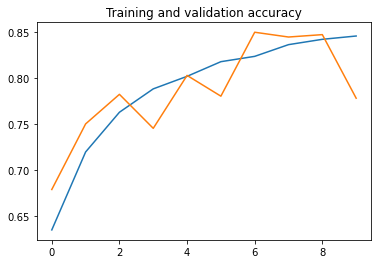

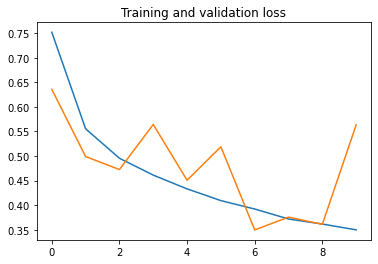

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [35]:
model.save("catsVSdogs.h5")